# Simple Example of a Simulation in jf1uids

## Imports

In [92]:
import jax.numpy as jnp

from jf1uids import CARTESIAN
from jf1uids import SimulationConfig
from jf1uids import SimulationParams
from jf1uids import get_helper_data
from jf1uids.fluid_equations.fluid import construct_primitive_state3D
from jf1uids import time_integration

from jf1uids import get_registered_variables


import matplotlib.pyplot as plt

## Simulation Setup

Let us set up a very simple simulation, mostly with default parameters.

First we get the configuration of the simulation, which contains parameters that typically do not change between simulations, changing which requires (just-in-time)-recompilation.

In [93]:
config = SimulationConfig(
    dimensionality = 3,
    geometry = CARTESIAN,
    num_cells = 41,
    num_ghost_cells = 1,
)

Next we setup the simulation parameters, things we might vary

In [94]:
params = SimulationParams(
    t_end = 0.1 # the typical value for a shock test
)

With this we generate some helper data, like the cell centers etc.

In [95]:
helper_data = get_helper_data(config)
registered_variables = get_registered_variables(config)

Next we setup the shock initial conditions, a uniform background with a sedov blast wave in the center.

In [96]:
# setup the initial fluid state in terms of rho, u, p

rho = jnp.ones((config.num_cells, config.num_cells, config.num_cells)) * 0.125
u_x = jnp.zeros((config.num_cells, config.num_cells, config.num_cells))
u_y = jnp.zeros((config.num_cells, config.num_cells, config.num_cells))
u_z = jnp.zeros((config.num_cells, config.num_cells, config.num_cells))
p = jnp.ones((config.num_cells, config.num_cells, config.num_cells)) * 0.1

# initialize sedov taylor blast wave
num_cells = config.num_cells
rho = rho.at[num_cells//2 - 2:num_cells//2 + 3, num_cells//2 - 2:num_cells//2 + 3, num_cells//2 - 2:num_cells//2 + 3].set(1.0)
p = p.at[num_cells//2 - 2:num_cells//2 + 3, num_cells//2 - 2:num_cells//2 + 3, num_cells//2 - 2:num_cells//2 + 3].set(1.0)
# get initial state
initial_state = construct_primitive_state3D(rho, u_x, u_y, u_z, p, registered_variables)

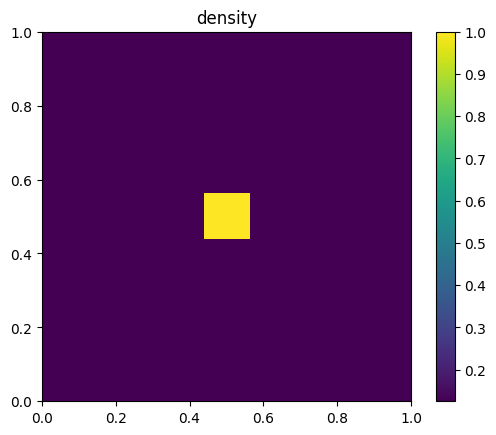

In [97]:
# plot a slice through the density
plt.title("density")
plt.imshow(initial_state[0, :, :, config.num_cells//2], origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()

## Running the simulation

In [98]:
import jax
from jf1uids.time_stepping.time_integration import _time_integration_fixed_steps3D

final_state = jax.block_until_ready(_time_integration_fixed_steps3D(initial_state, config, params, helper_data, registered_variables))

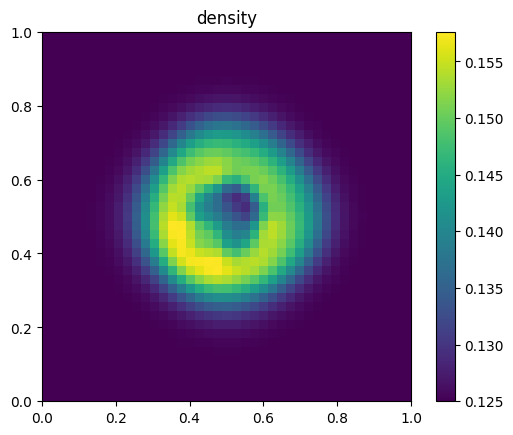

In [99]:
# plot a slice through the density
plt.title("density")
plt.imshow(final_state[0, config.num_cells//2, :, :], origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()

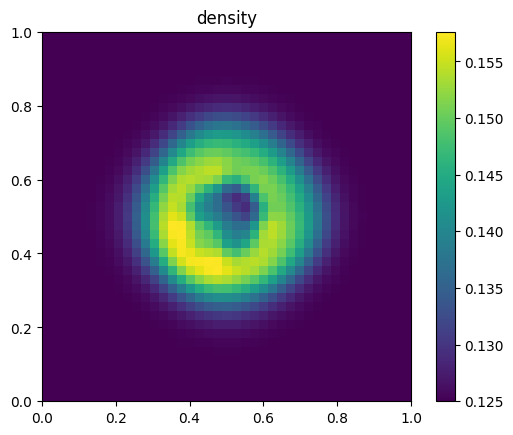

In [100]:
plt.title("density")
plt.imshow(final_state[0, config.num_cells//2, :, :], origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()